# Data Analysis of Chess Grandmasters (GM)

Recently, the Indian-American Abhimanyu Mishra became the [youngest Grandmaster](https://www.chess.com/news/view/abhimanyu-mishra-youngest-grandmaster-in-chess-history) in chess history, qualifying for the title at the age of 12 years 4 months and 25 days, whereas the Venezuelan [Salvador Diaz Carias](https://www.chess.com/news/view/venezuela-chess-player-fm-title-88-salvador-diaz-carias) got the FIDE Master (FM) Title at the age of 88. Motivated by these news, which I came to know by the Brazilian YouTube channel [Xadrez Brasil](https://www.youtube.com/c/XadrezBrasil), I decided to do a data analysis and visualization about the GMs based on Wikipedia "[List of chess grandmasters](https://en.wikipedia.org/wiki/List_of_chess_grandmasters)".

## General Research Questions about GMs

We aim at approaching the following questions. These questions guide our exploration, but does not limit it.

1. What is the distribution of GM title since 1950 (when it started)?

2. What is the relationship, if any, between age and receiving GM title?

3. What is the distribution of GM title among the countries and sex?

## Python Libraries

In [1]:
# Importing the necessary Python libraries to our tasks:

import numpy as np # data analysis
import pandas as pd # data analysis and manipulation
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
import seaborn as sns # data visualization

from IPython.core.display import display, HTML
# This package allows embedding here the visualization made by Flourish website: https://app.flourish.studio/.

## Data Extraction

In [2]:
# Our data source: the Wikipedia "List of chess grandmasters".

url = "https://en.wikipedia.org/wiki/List_of_chess_grandmasters"

## Data Cleaning and Preparation

In [3]:
# Reading and selecting the table we are interested in:

html = pd.read_html(url, match = "Birthplace")
html

# Notice the output is a list.

[                    Name  ...                                             Notes
 0                    NaN  ...                                               NaN
 1         Aagaard, Jacob  ...  Di Felice; title application; currently Scotland
 2          Abasov, Nijat  ...                      Di Felice; title application
 3       Abbasifar, Hasan  ...              Di Felice; title application[note 1]
 4         Abbasov, Farid  ...                      Di Felice; title application
 ...                  ...  ...                                               ...
 1935          Zoler, Dan  ...             Di Felice; title application[note 84]
 1936     Zontakh, Andrey  ...                                         Di Felice
 1937  Zubarev, Alexander  ...                                         Di Felice
 1938    Zubov, Alexander  ...                      Di Felice; title application
 1939   Zvjaginsev, Vadim  ...                                         Di Felice
 
 [1940 rows x 9 columns]]

In [4]:
# Taking the table as a DataFrame from the list:

html[0]

,Name,FIDE ID,Born,Birthplace,Died,TitleYear,Federation,Sex,Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Aagaard, Jacob",1401815.0,1973-07-31,Hørsholm,NaN,2007.0,Denmark,M,Di Felice; title application; currently Scotland
2,"Abasov, Nijat",13402960.0,1995-05-14,Baku,NaN,2011.0,Azerbaijan,M,Di Felice; title application
3,"Abbasifar, Hasan",12501000.0,1972-09-12,Shiraz,NaN,2013.0,Iran,M,Di Felice; title application[note 1]
4,"Abbasov, Farid",13400665.0,1979-01-31,Baku,NaN,2007.0,Azerbaijan,M,Di Felice; title application
...,...,...,...,...,...,...,...,...,...
1935,"Zoler, Dan",2800705.0,1974-01-10,NaN,NaN,2011.0,Israel,M,Di Felice; title application[note 84]
1936,"Zontakh, Andrey",14101130.0,1970-11-04,NaN,NaN,1997.0,Ukraine,M,Di Felice
1937,"Zubarev, Alexander",14104385.0,1979-12-17,NaN,NaN,2002.0,Ukraine,M,Di Felice
1938,"Zubov, Alexander",14109409.0,1983-04-04,NaN,NaN,2011.0,Ukraine,M,Di Felice; title application


In [5]:
# Reducing the table to just the columns we are interested in:

table1 = html[0][["Name", "Born", "TitleYear", "Federation", "Sex"]]
table1

,Name,Born,TitleYear,Federation,Sex
0,NaN,NaN,NaN,NaN,NaN
1,"Aagaard, Jacob",1973-07-31,2007.0,Denmark,M
2,"Abasov, Nijat",1995-05-14,2011.0,Azerbaijan,M
3,"Abbasifar, Hasan",1972-09-12,2013.0,Iran,M
4,"Abbasov, Farid",1979-01-31,2007.0,Azerbaijan,M
...,...,...,...,...,...
1935,"Zoler, Dan",1974-01-10,2011.0,Israel,M
1936,"Zontakh, Andrey",1970-11-04,1997.0,Ukraine,M
1937,"Zubarev, Alexander",1979-12-17,2002.0,Ukraine,M
1938,"Zubov, Alexander",1983-04-04,2011.0,Ukraine,M


In [6]:
# Dropping the first nonsense line (line zero):

table2 = table1.drop(0)
table2

,Name,Born,TitleYear,Federation,Sex
1,"Aagaard, Jacob",1973-07-31,2007.0,Denmark,M
2,"Abasov, Nijat",1995-05-14,2011.0,Azerbaijan,M
3,"Abbasifar, Hasan",1972-09-12,2013.0,Iran,M
4,"Abbasov, Farid",1979-01-31,2007.0,Azerbaijan,M
5,"Abdumalik, Zhansaya",2000-01-12,2021.0,Kazakhstan,F
...,...,...,...,...,...
1935,"Zoler, Dan",1974-01-10,2011.0,Israel,M
1936,"Zontakh, Andrey",1970-11-04,1997.0,Ukraine,M
1937,"Zubarev, Alexander",1979-12-17,2002.0,Ukraine,M
1938,"Zubov, Alexander",1983-04-04,2011.0,Ukraine,M


In [7]:
# Changing the value of the column 'Born' so that we have only the year:

table2['Born'] = table2['Born'].apply(lambda x: x[:4])
table2['Born']

# This introduces a small imprecision in our analysis since we are not going to consider the exact birth date.
# However, as we do not have the exact date of the GM title acquisition, this is the best we can do.

1       1973
2       1995
3       1972
4       1979
5       2000
        ... 
1935    1974
1936    1970
1937    1979
1938    1983
1939    1976
Name: Born, Length: 1939, dtype: object

In [8]:
# Changing the data type of the value of the column 'Born' to integer instead of string:

table2['Born'] = table2['Born'].apply(lambda x: float(x))
table2['Born']

1       1973.0
2       1995.0
3       1972.0
4       1979.0
5       2000.0
         ...  
1935    1974.0
1936    1970.0
1937    1979.0
1938    1983.0
1939    1976.0
Name: Born, Length: 1939, dtype: float64

In [9]:
# Adding a column with TitleAge.
# The age of the GMs when they got the title is the title year minus his/her birth date.

table2['TitleAge'] = table2['TitleYear'] - table2['Born']
table2

,Name,Born,TitleYear,Federation,Sex,TitleAge
1,"Aagaard, Jacob",1973.0,2007.0,Denmark,M,34.0
2,"Abasov, Nijat",1995.0,2011.0,Azerbaijan,M,16.0
3,"Abbasifar, Hasan",1972.0,2013.0,Iran,M,41.0
4,"Abbasov, Farid",1979.0,2007.0,Azerbaijan,M,28.0
5,"Abdumalik, Zhansaya",2000.0,2021.0,Kazakhstan,F,21.0
...,...,...,...,...,...,...
1935,"Zoler, Dan",1974.0,2011.0,Israel,M,37.0
1936,"Zontakh, Andrey",1970.0,1997.0,Ukraine,M,27.0
1937,"Zubarev, Alexander",1979.0,2002.0,Ukraine,M,23.0
1938,"Zubov, Alexander",1983.0,2011.0,Ukraine,M,28.0


## Data Analysis and Visualization

### The age of the GM title receivers

In [10]:
# Descriptive statistics summary about the age of GMs when they got the title:

table2['TitleAge'].describe()

count    1939.000000
mean       27.470346
std        10.043071
min        13.000000
25%        21.000000
50%        25.000000
75%        31.000000
max        88.000000
Name: TitleAge, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


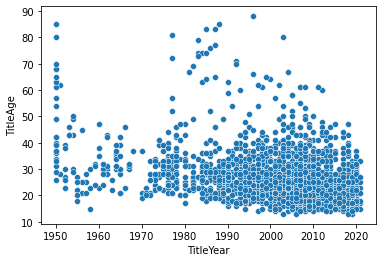

In [11]:
# Scatter plot showing the distribution of title age of the GM and the year of the title:

sns.scatterplot(table2['TitleYear'], table2['TitleAge'])

An interactive scatter plot is displayed at the end of this document.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


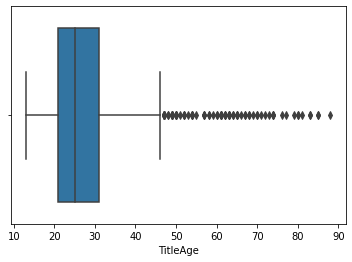

In [12]:
# Box plot about the title age of the GMs when they received the title.

sns.boxplot(table2['TitleAge'])

By the analysis and visualization above, we notice that:

* The oldest GM title receiver is about 88 years old. But this is **not** entirely correct, because among the 10 oldest chess players (all being at least 77 years old) only [Jacques Mieses](https://en.wikipedia.org/wiki/Jacques_Mieses) (1865-1954) was an active player. He received his title at the age of 85 in 1950 (inauguration of the GM title), but it is said his chess strength was not that great anymore. The other 9 players received honorary titles.

* The mean of GM title receivers age is 27 years old. Indeed, 75% of them is at most 31 years old. The standard deviation is about 10 years old

* Both the scatter plot and, especially, the box plot highlight that whoever receives the GM title at the age of 45 years or above is already an outlier among the GMs. We see this is even more true once we know most elderly GM title receivers got an honorary title, not a regular one.

* The scatter plot also shows a huge growth of GM titles, in particular since 1990.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


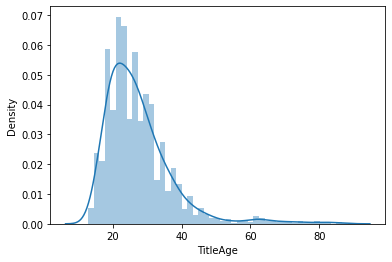

In [13]:
# Distribution of age of GM title receivers.

sns.distplot(table2['TitleAge'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


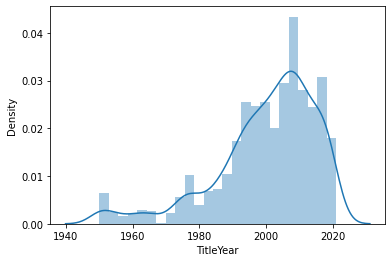

In [14]:
# Distribution of GM titles along the years.

sns.distplot(table2['TitleYear'])

The two graphs above show that:

* Again, the age of GM title receivers is concentrated between the 20s years old.

* Since 1990 we have observed a lot more GM titles. Most likely this is due to the fact that chess became much more popular and accessible, particularly after the spreading of home computers and the internet. The more people interested in chess, the more GMs.

In [15]:
# Correlations

table2.corr()

# We see the year of birth and the title year are highly correlated with each other

,Born,TitleYear,TitleAge
Born,1.000000,0.890823,-0.721711
TitleYear,0.890823,1.000000,-0.328418
TitleAge,-0.721711,-0.328418,1.000000


In [16]:
# The first 10 oldest GM title receivers.

table2.sort_values('TitleAge')[-10:]

# We notice very old GMs often have received honorary title for their career.

# By the way, there are only 19 GMs whose age is at least 70 years old.

,Name,Born,TitleYear,Federation,Sex,TitleAge
1116,"Mikėnas, Vladas",1910.0,1987.0,Lithuania,M,77.0
1015,"Lundin, Erik",1904.0,1983.0,Sweden,M,79.0
1912,"Zemgalis, Elmārs",1923.0,2003.0,Latvia,M,80.0
1070,"Maróczy, Géza",1870.0,1950.0,Hungary,M,80.0
261,"Canal, Esteban",1896.0,1977.0,Peru,M,81.0
1150,"Monticelli, Mario",1902.0,1985.0,Italy,M,83.0
1040,"Makogonov, Vladimir",1904.0,1987.0,Soviet Union,M,83.0
855,"Koltanowski, George",1903.0,1988.0,Belgium,M,85.0
1112,"Mieses, Jacques",1865.0,1950.0,England,M,85.0
1285,"Paoli, Enrico",1908.0,1996.0,Italy,M,88.0


### Distributions of GMs per Sex and Country

In [17]:
# GMs per country:

countries = dict()
for i in table2['Federation']:
  #print(i)
  countries[i] = countries.get(i, 0) + 1
countries

{'Albania': 1,
 'Algeria': 2,
 'Andorra': 2,
 'Argentina': 33,
 'Armenia': 42,
 'Australia': 11,
 'Austria': 8,
 'Azerbaijan': 28,
 'Bangladesh': 5,
 'Belarus': 20,
 'Belgium': 7,
 'Bolivia': 1,
 'Bosnia and Herzegovina': 5,
 'Brazil': 14,
 'Bulgaria': 41,
 'Canada': 14,
 'Chile': 6,
 'China': 50,
 'Colombia': 10,
 'Costa Rica': 2,
 'Croatia': 23,
 'Cuba': 35,
 'Czech Republic': 27,
 'Czecho\xadslovakia': 11,
 'Denmark': 16,
 'Dominican Republic': 1,
 'East Germany': 4,
 'Ecuador': 1,
 'Egypt': 6,
 'England': 43,
 'Estonia': 6,
 'FIDE': 1,
 'Faroe Islands': 1,
 'Finland': 6,
 'France': 47,
 'Georgia': 31,
 'Germany': 79,
 'Greece': 15,
 'Hungary': 66,
 'Iceland': 14,
 'India': 67,
 'Indonesia': 8,
 'Iran': 17,
 'Israel': 43,
 'Italy': 17,
 'Kazakhstan': 16,
 'Kyrgyzstan': 1,
 'Latvia': 13,
 'Lithuania': 11,
 'Luxembourg': 1,
 'Mexico': 7,
 'Moldava': 1,
 'Moldova': 7,
 'Mongolia': 8,
 'Montenegro': 6,
 'Morocco': 1,
 'Myanmar': 1,
 'Netherlands': 40,
 'New Zealand': 1,
 'North Macedoni

In [18]:
# GM per sex

sex = dict()
for i in table2['Sex']:
  #print(i)
  sex[i] = sex.get(i, 0) + 1
sex

# Female GMs represent only 1.95% of the total of GMs.

{'F': 38, 'M': 1901}

In [19]:
# Distributions of GMs per sex and country displayed using Flourish.
# Interactive visualization!

display(HTML('https://public.flourish.studio/visualisation/6633672/'))

In [20]:
# Scatter plot (with regression line) showing the distribution of title age of the GM and the year of the title:
# Interactive visualization!

display(HTML('https://public.flourish.studio/visualisation/6633947/'))

In [21]:
# For converting the dataset seen in the variable table2 (DataFrame) into a csv file:

table2.to_csv('chess.csv')